In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('/Users/johnmetzger/Desktop/Coding/Project2/base_scrape.csv')
# Take a look at the datatypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   price      2880 non-null   object
 1   pics       2880 non-null   bool  
 2   hood       2880 non-null   object
 3   title      2880 non-null   object
 4   datetimes  2880 non-null   object
dtypes: bool(1), object(4)
memory usage: 92.9+ KB


GOAL: delete rows with price >>50,000

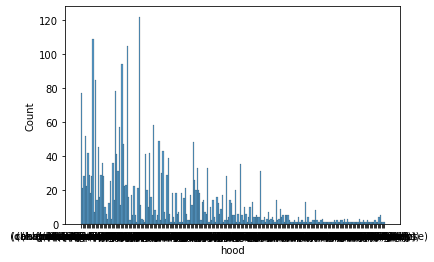

In [3]:
sns.histplot(df['hood'],kde = False)
plt.show()

In [4]:
#### This is how you extract datetime data and make it numerical.  
# You need to turn it into a dictionary
# Then you assign it to a variable
# Then you can add it to the dataframe, but it may need to have a
# matching index with the dataframe, which this one does it was
# derived from there.
# Last thing this cell does is call the new data frame to make sure
# the new column is there

df['datetimes']=pd.to_datetime(df['datetimes'])
df_hour= df['datetimes'].dt.hour
dave_hour = dict(df_hour)
df["hours"] = pd.Series(dave_hour)
df

,price,pics,hood,title,datetimes,hours
0,$65,False,(hayward / castro valley),Amperex bugle boy mullard 5ar4 gz34,2021-01-19 18:45:00,18
1,$700,False,(hayward / castro valley),American standard fender precision bass wanted,2021-01-19 18:45:00,18
2,$75,True,(hayward / castro valley),Jbl 2118h 8” woofer/midrange,2021-01-19 18:45:00,18
3,$10,True,(hayward / castro valley),Crossovers 3 way,2021-01-19 18:45:00,18
4,$775,True,(hayward / castro valley),Fractal Axefx ultra. (Mint),2021-01-19 18:44:00,18
...,...,...,...,...,...,...
2875,$40,True,(marina / cow hollow),Vox VX12 Celestion G12P-80 16 ohm Guitar Speak...,2021-01-17 09:00:00,9
2876,$900,True,(oakland piedmont / montclair),King 2b+ Trombone,2021-01-17 09:00:00,9
2877,$250,True,(willow glen / cambrian),Line 6 Pod HD500 Multi-Effects Guitar Pedal,2021-01-17 08:59:00,8
2878,"$1,800",True,(novato),1921 Chickering Baby Grand Piano,2021-01-17 08:57:00,8


In [5]:
#### Same as above but day of the month.  Here: January 2021.

df_day= df['datetimes'].dt.day
mikey_day = dict(df_day)
df["day"] = pd.Series(mikey_day)
df;

In [6]:
#Same as above, but it counts the charecters in the title cell
# then makes a dictionary and adds it as a column

title_char_count = df['title'].str.len()
colin_count = dict(title_char_count)
df['title_char_count']= pd.Series(colin_count)
df;

In [7]:
#Same as above, but it changes the boolean to a binary 0-1
# then makes a dictionary and adds it as a column

john = df['pics']*1
df['has_pics']= pd.Series(john)

## Save this as the df that doesn't get columns deleted
df_init_all_col = df
df

,price,pics,hood,title,datetimes,hours,day,title_char_count,has_pics
0,$65,False,(hayward / castro valley),Amperex bugle boy mullard 5ar4 gz34,2021-01-19 18:45:00,18,19,37,0
1,$700,False,(hayward / castro valley),American standard fender precision bass wanted,2021-01-19 18:45:00,18,19,46,0
2,$75,True,(hayward / castro valley),Jbl 2118h 8” woofer/midrange,2021-01-19 18:45:00,18,19,28,1
3,$10,True,(hayward / castro valley),Crossovers 3 way,2021-01-19 18:45:00,18,19,16,1
4,$775,True,(hayward / castro valley),Fractal Axefx ultra. (Mint),2021-01-19 18:44:00,18,19,27,1
...,...,...,...,...,...,...,...,...,...
2875,$40,True,(marina / cow hollow),Vox VX12 Celestion G12P-80 16 ohm Guitar Speak...,2021-01-17 09:00:00,9,17,66,1
2876,$900,True,(oakland piedmont / montclair),King 2b+ Trombone,2021-01-17 09:00:00,9,17,17,1
2877,$250,True,(willow glen / cambrian),Line 6 Pod HD500 Multi-Effects Guitar Pedal,2021-01-17 08:59:00,8,17,43,1
2878,"$1,800",True,(novato),1921 Chickering Baby Grand Piano,2021-01-17 08:57:00,8,17,32,1


In [8]:
del df['datetimes']
del df['pics']
del df['hood']
del df['title']
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
### this is the data frame to run the initial model on
df_init = df

<ipython-input-8-f9a400414950>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


In [9]:
## Convert price to int64
df_init['price']=np.array(df_init['price'], dtype=int)

In [10]:
df_init.corr()

,price,hours,day,title_char_count,has_pics
price,1.000000,-0.020264,0.022406,0.015371,-0.080868
hours,-0.020264,1.000000,-0.278652,0.001740,-0.003657
day,0.022406,-0.278652,1.000000,0.014097,0.020914
title_char_count,0.015371,0.001740,0.014097,1.000000,-0.002171
has_pics,-0.080868,-0.003657,0.020914,-0.002171,1.000000


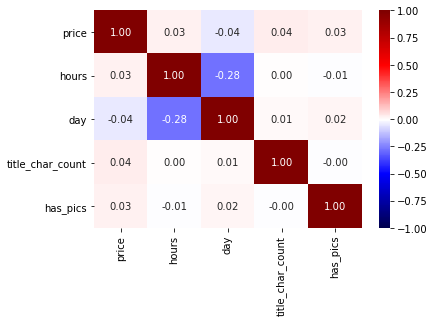

In [36]:
doot = sns.heatmap(df_init.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt=".2f")

In [46]:
doot.figure.savefig("doot.pdf", format="pdf")

In [12]:
df_init.drop(df_init.loc[df_init['price']>50000].index, inplace=True)

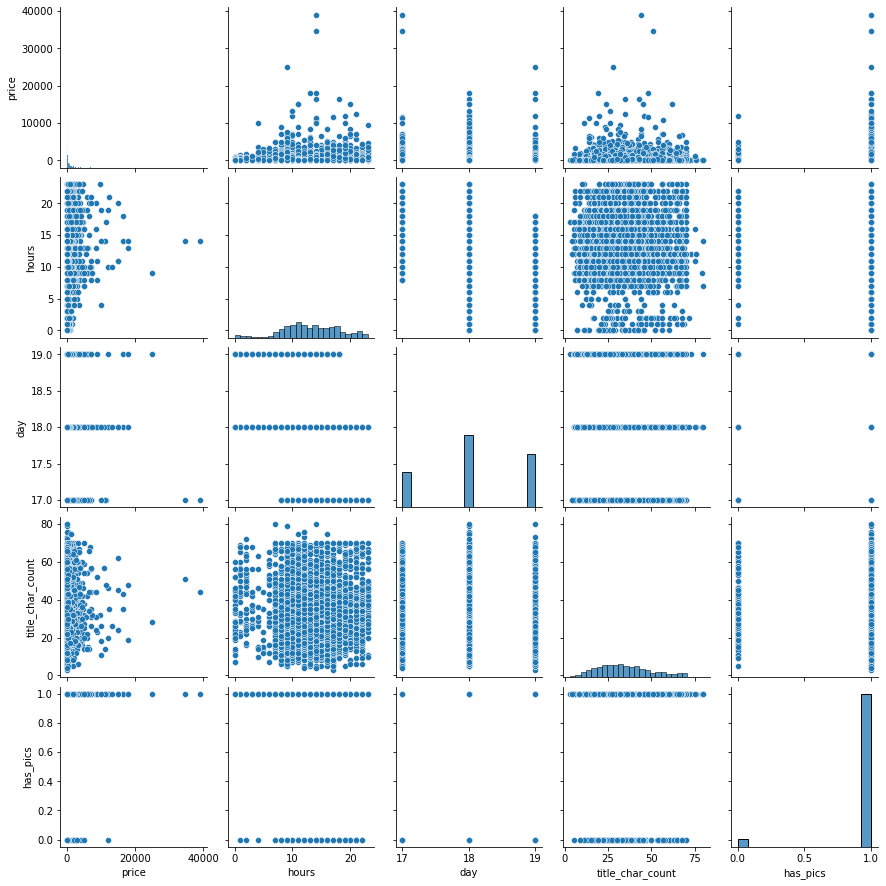

In [38]:
dino = sns.pairplot(df_init)

In [44]:
dino.fig.savefig("dino.pdf", format="pdf")

In [14]:
df_init.corr()

,price,hours,day,title_char_count,has_pics
price,1.000000,0.026697,-0.043834,0.038198,0.029070
hours,0.026697,1.000000,-0.278362,0.001870,-0.005273
day,-0.043834,-0.278362,1.000000,0.013694,0.022827
title_char_count,0.038198,0.001870,0.013694,1.000000,-0.000824
has_pics,0.029070,-0.005273,0.022827,-0.000824,1.000000


(0.0, 10000.0)

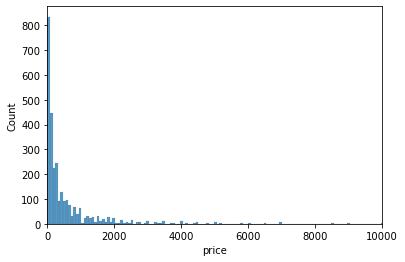

In [28]:
yeet = sns.histplot(df_init['price'])
plt.xlim(0, 10000) 


In [29]:
yeet.figure.savefig("yeet10000.svg", format="svg")

In [ ]:
df_init.to_csv('/Users/johnmetzger/Desktop/Coding/Project2/df_init.csv', index = False)

In [62]:
sands = sns.lmplot(data=df_init['hours'],df_init['price']) 

SyntaxError: positional argument follows keyword argument (<ipython-input-62-70964fdb83ab>, line 1)

[(0.0, 3000.0)]

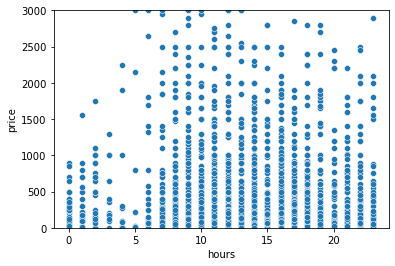

In [87]:
dances = sns.scatterplot(data=df_init, x="hours", y="price")
dances.set(ylim=(0, 3000))

In [91]:
dances.figure.savefig("dances_3000.png", format="png")